<a href="https://colab.research.google.com/github/KovryakRuslan312005/MH-Kovryak-Ruslan-3-16/blob/main/%D0%9A%D0%BE%D0%B2%D1%80%D1%8F%D0%BA%20%D0%A0%D1%83%D1%81%D0%BB%D0%B0%D0%BD%20%D0%9F%D0%B0%D0%B2%D0%BB%D0%BE%D0%B2%D0%B8%D1%87%20%D0%9B%D0%B0%D0%B1%D0%B0%20%E2%84%9610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ковряк Руслан Павлович Лаба №10

КРОК №1. Імпортуємо бібліотеки

In [ ]:
# Підключаємо потрібні бібліотеки
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist


КРОК №2.Завантажуємо та підготовляємо дані для роботи

In [ ]:
# Завантажуємо дані
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізуємо пікселі (від 0 до 1) і додаємо канал (1)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


КРОК №3.Створюємо моделі нейронної мережі

In [ ]:
# Створюємо просту CNN-модель
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 класів
])


КРОК №4.Виводимо структуру моделі

In [ ]:
# Виводимо інформацію про шари моделі
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

КРОК №5.Компіляція та тренування моделі

In [ ]:
# Компілюємо модель і запускаємо навчання
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Тренуємо модель (80% тренування, 20% валідація)
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7594 - loss: 0.6767 - val_accuracy: 0.8701 - val_loss: 0.3565
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8775 - loss: 0.3331 - val_accuracy: 0.8891 - val_loss: 0.3075
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8922 - loss: 0.2901 - val_accuracy: 0.8991 - val_loss: 0.2781
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9093 - loss: 0.2459 - val_accuracy: 0.8928 - val_loss: 0.2903
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9164 - loss: 0.2229 - val_accuracy: 0.9082 - val_loss: 0.2513
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9255 - loss: 0.2004 - val_accuracy: 0.9122 - val_loss: 0.2531
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9328 - loss: 0.1825 - val_accuracy: 0.9082 - val_loss: 0.2644
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9391 -

КРОК №6.Будуємо графіки точності та помилок

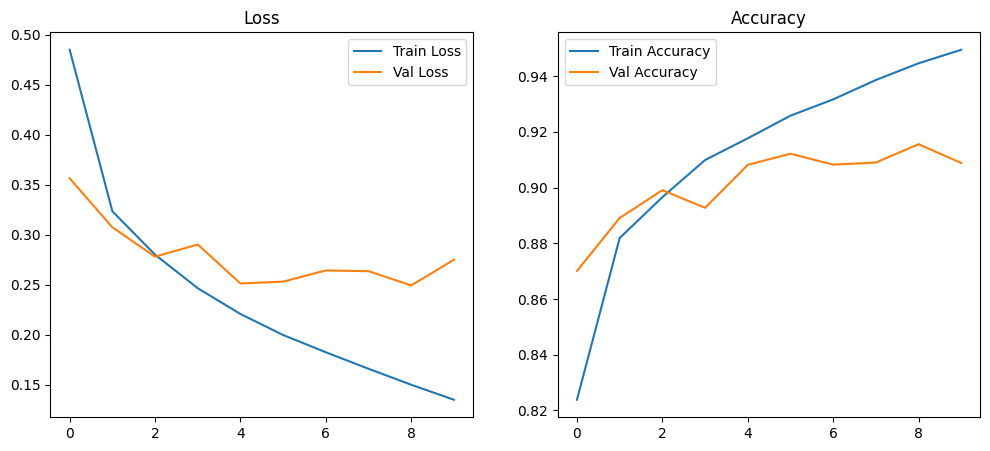

In [ ]:
# Малюємо графіки для loss і accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()


КРОК №7.Отримуємо прогнози

In [ ]:
# Отримуємо прогнозовані класи
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


КРОК №8.Виводимо 10 випадкових зображень з передбаченням

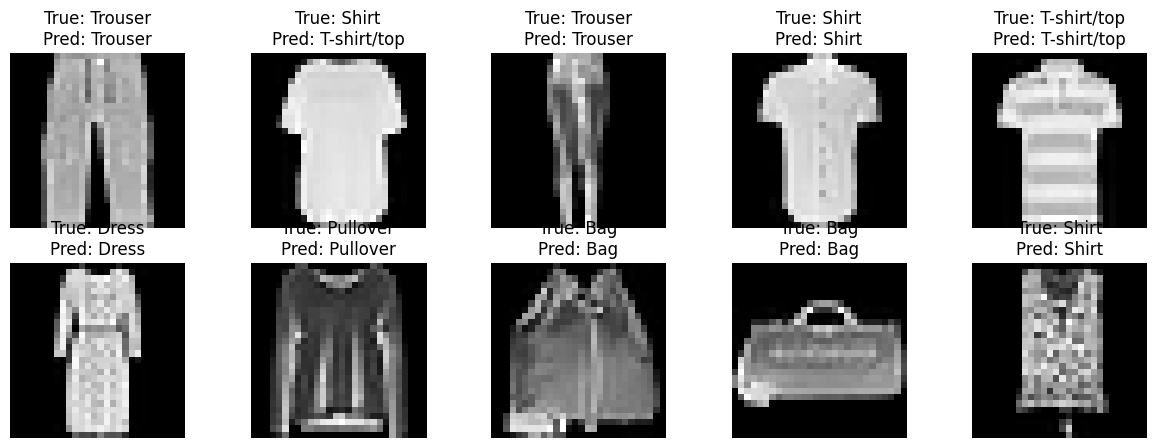

In [ ]:
 # Назви класів для розшифрування чисел
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Випадкові індекси
indices = np.random.choice(len(x_test), 10, replace=False)

# Малюємо 10 зображень
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[predicted_classes[idx]]}")
    plt.axis('off')
plt.show()


Висновок:В цій лабораторній роботі ми працювали з датасетом  fashion_mnist та виводили sumarry,будували графіки та виводили 10 випадкових зображень для прогнозу классів.